In [64]:
#import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [65]:
#upload CSV file
data = pd. read_csv('Lyft_Data_V1.csv')
print("Data uploaded successfully!")

Data uploaded successfully!


In [66]:
#create a dataframe with data
df = pd.DataFrame(data)
df.tail()

,Date,Day of Week,Ride ID Number,Total Pay,Tip,Bonus,Booked Time (min),Distance,Stop In Ride,Start Time,End Time,Passenger Pay,Base Pay
57,9/4/2025,Thursday,1314,$12.96,$3.80,$2.11,28,7.47,no,5:09:00 PM,5:40:00 PM,$18.99,$7.05
58,9/5/2025,Friday,1315,$4.92,$-,$0.69,12,2.17,no,11:49:00 AM,12:01:00 PM,$9.46,$3.44
59,9/5/2025,Friday,1316,$13.96,$4.50,$2.11,25,5.64,Yes,4:40:00 PM,5:05:00 PM,$17.99,$7.05
60,9/5/2025,Friday,1317,$15.48,$4.34,$2.57,19,7.47,no,5:17:00 PM,5:36:00 PM,$19.55,$8.57
61,9/5/2025,Friday,1318,$8.08,$2.23,$1.19,15,4.06,no,5:36:00 PM,5:52:00 PM,$11.14,$3.96


In [93]:
#clean DF

#remove lead and trail spaces from columns
df.columns = df.columns.str.strip()
df.columns

#select money columns
money_col = ['Total Pay', 'Tip', 'Bonus', 'Passenger Pay', 'Base Pay']
df[money_col]

#Normalize money values
df[money_col] = (
    df[money_col]
    .replace({r'\$-':'0.00'},regex=True)     #Set blank values to '0.00'
    .replace(r'[\$,]', '',regex=True)        #Remove '$' from money columns
    .astype(float)                           #make all values floats
)
df.tail()                                    #show updated tail for verification


,Date,Day of Week,Ride ID Number,Total Pay,Tip,Bonus,Booked Time (min),Distance,Stop In Ride,Start Time,End Time,Passenger Pay,Base Pay
57,9/4/2025,Thursday,1314,12.96,3.80,2.11,28,7.47,no,5:09:00 PM,5:40:00 PM,18.99,7.05
58,9/5/2025,Friday,1315,4.92,0.00,0.69,12,2.17,no,11:49:00 AM,12:01:00 PM,9.46,3.44
59,9/5/2025,Friday,1316,13.96,4.50,2.11,25,5.64,Yes,4:40:00 PM,5:05:00 PM,17.99,7.05
60,9/5/2025,Friday,1317,15.48,4.34,2.57,19,7.47,no,5:17:00 PM,5:36:00 PM,19.55,8.57
61,9/5/2025,Friday,1318,8.08,2.23,1.19,15,4.06,no,5:36:00 PM,5:52:00 PM,11.14,3.96


In [108]:
# Averages
avg_pay_per_ride = df['Total Pay'].mean().round(2)
print('The average pay per ride is $',avg_pay_per_ride,'.')

avg_ride_leng = df['Booked Time (min)'].mean().round()
avg_ride_dist = df['Distance'].mean().round(2)
print('The average ride length is',avg_ride_leng,'minutes.')
print('The average ride is',avg_ride_dist,'miles.')
      

The average pay per ride is $ 9.1 .
The average ride length is 20.0 minutes.
The average ride is 6.91 miles.


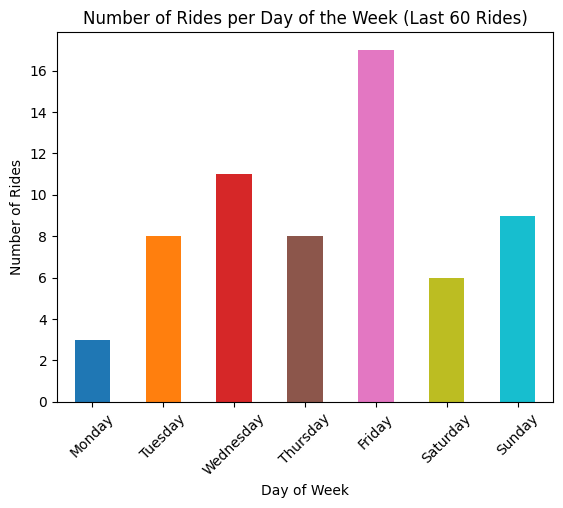

In [112]:
#Visualization
# Count rides per day
day_counts = df['Day of Week'].value_counts()

# Reorder to start on Monday instead of sorting alphabetically
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_counts = day_counts.reindex(order)

#Colors
colors =  plt.cm.tab10(np.linspace(0,1,7))      #7 distinct colors

# Plot
day_counts.plot(kind="bar", color = colors)

plt.title("Number of Rides per Day of the Week (Last 60 Rides)")
plt.xlabel("Day of Week")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)        # tilt labels for readability
plt.show()